<a href="https://colab.research.google.com/github/fahimabrar/Data-Scientist-Jobs-in-UK/blob/main/Data_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [3]:
data = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/fahimabrar/Data-Scientist-Jobs-in-UK/main/data/ds_data.csv"))

In [4]:
data.head()

,Unnamed: 0,jobtitle,salary,locality,region,jobtype,description,url
0,0,Data Scientist,Competitive salary,South East England,London,"Contract,full-time",Apply on employer's website Data Scientist-12 ...,https://www.reed.co.uk/jobs/data-scientist/445...
1,1,Data Scientist,NaN,Surrey,Croydon,"Permanent,full-time",NaN,https://www.reed.co.uk/jobs/data-scientist/447...
2,2,Data Scientist,"£60,000 - £65,000 per annum",Ireland,Dublin,"Permanent,full-time","Apply now Data Scientist Dublin, Ireland - ful...",https://www.reed.co.uk/jobs/data-scientist/444...
3,3,Data Scientist,"£50,000 - £65,000 per annum",Lancashire,Manchester,"Permanent,full-time",Apply now Senior Data Scientist Data Idols are...,https://www.reed.co.uk/jobs/data-scientist/446...
4,4,Data Scientist,£17.28 - £20.74 per hour,Warwickshire,Leamington Spa,"Contract,full-time",Apply now Role: Data ScientistLocation: Leamin...,https://www.reed.co.uk/jobs/data-scientist/447...


In [ ]:
data.jobtitle.value_counts()

In [ ]:
da

In [ ]:
data.region.value_counts()

## The salary columns looks not lice, Lets clean the numeric values from **£60,000 - £65,000 per annum**	 to **60,000-65000**

In [8]:
import re


def salary(salary):
  try:
    x = re.sub("[^\d\.\-]", "", salary)
    if x== '':
      x = salary
    return x
  except:
    return np.nan

In [9]:
data["salary"] = data["salary"].apply(salary)

In [10]:
data.head()

,Unnamed: 0,jobtitle,salary,locality,region,jobtype,description,url
0,0,Data Scientist,Competitive salary,South East England,London,"Contract,full-time",Apply on employer's website Data Scientist-12 ...,https://www.reed.co.uk/jobs/data-scientist/445...
1,1,Data Scientist,NaN,Surrey,Croydon,"Permanent,full-time",NaN,https://www.reed.co.uk/jobs/data-scientist/447...
2,2,Data Scientist,60000-65000,Ireland,Dublin,"Permanent,full-time","Apply now Data Scientist Dublin, Ireland - ful...",https://www.reed.co.uk/jobs/data-scientist/444...
3,3,Data Scientist,50000-65000,Lancashire,Manchester,"Permanent,full-time",Apply now Senior Data Scientist Data Idols are...,https://www.reed.co.uk/jobs/data-scientist/446...
4,4,Data Scientist,17.28-20.74,Warwickshire,Leamington Spa,"Contract,full-time",Apply now Role: Data ScientistLocation: Leamin...,https://www.reed.co.uk/jobs/data-scientist/447...


# Lets see where thejobs are most located

In [15]:
data.region.value_counts()

London            499
Croydon            40
Manchester         36
Cambridge          21
Leamington Spa     20
                 ... 
Middlesbrough       1
Corsham             1
Edgbaston           1
Aberdeen            1
Worcester           1
Name: region, Length: 179, dtype: int64

# Amost half of the job region in London

## Lets see how many types of Jobs are availavle e.g. Contract, fulltime, Permanent 

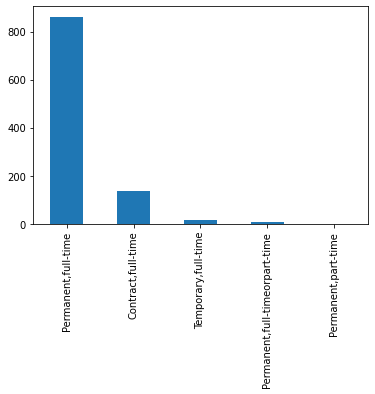

In [77]:
data.jobtype.value_counts().plot.bar()

In [16]:
data.jobtype.value_counts()

Permanent,full-time               861
Contract,full-time                138
Temporary,full-time                18
Permanent,full-timeorpart-time      7
Permanent,part-time                 1
Name: jobtype, dtype: int64

# **Python or R ?**

In [17]:
def entity(val):
  try:
    language = re.findall(r' python|Python| R ', val)
    return language
  except:
    return ""

In [18]:
language = data.description.apply(entity)
language

0                    [ R ]
1                         
2        [Python,  python]
3         [Python, Python]
4       [ R , Python,  R ]
               ...        
1020                    []
1021              [Python]
1022              [Python]
1023              [Python]
1024                    []
Name: description, Length: 1025, dtype: object

In [51]:
lan = []
for i in range(len(language)):
  a = [lan.strip().lower() for lan in language[i]] 
  if(len(a)>0):
    lan.append(list(set(a)))

In [43]:
len(data.description)

1025

In [44]:
data.description.isnull().sum()

61

In [70]:
python = 0 
r = 0
r_and_python = 0
for i in range(len(lan)):
  if len(lan[i]) >1:
    r_and_python = r_and_python + 1
  elif lan[i][0] == 'r':
    r = r +1
  elif lan[i][0] == 'python':
    python = python + 1


In [71]:
print(python)
print(r)
print(r_and_python)

452
43
67


In [72]:
X = ['Python', 'R', 'Python and R']
y = [452, 43, 67]

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


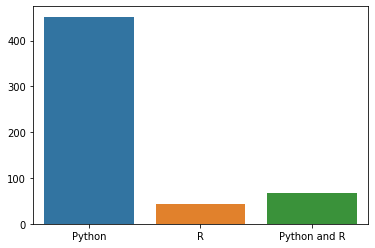

In [75]:
sns.barplot(X, y)